In [2]:
from IPython.display import YouTubeVideo, Image

# Aprendizado Supervisionado 

## Naive Bayes

Para falar do *Naive Bayes* é importante relembrar alguns aspectos da **Probabilidade**. A visão da probabilidade que precisamos ter é daquela que lida com eventos incertos sejam passados ou futuros. Calcular a probabilidade nada mais é do que calcular as chances de um evento específico dentre um conjunto maior de possibildades no qual aquele evento está inserido. 

Vamos entender um pouco de probabilidade no vídeo a seguir:

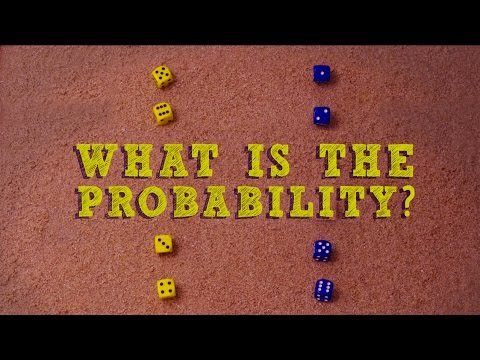

In [3]:
YouTubeVideo("Kgudt4PXs28")

Vamos ver um outro exemplo, o problema das 3 portas ou *Problema de Monty Hall*. 

A cena do filme [21 Quebrando a Banca](https://www.imdb.com/title/tt0478087/) ilustra esse problema:

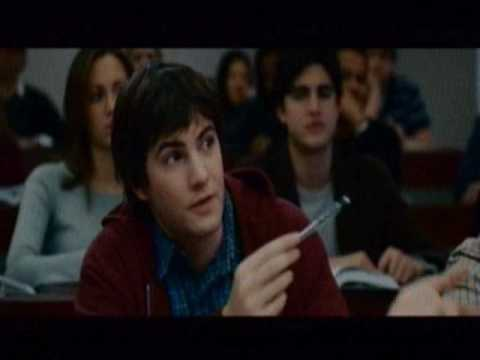

In [4]:
YouTubeVideo("DSbtIa8NM5E")

Vamos entender o problema:

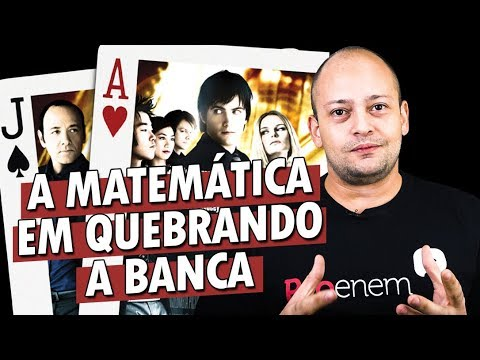

In [5]:
YouTubeVideo("x1zUc6XTRm8")

A explicação básica é que no início do game, o participante tinha 33% de chances de acertar a porta com o prêmio. No entanto, quando o apresentador abre uma porta que não tinha o prêmio e pergunta se o participante quer trocar de porta, ele aumenta as chances do partipante para 66%. Isso é probailidade, a pergunta do apresentador fez com que toda a probabilidade do problema mudasse. 

Vivemos em um mundo não-determinístico (ou seja, probabilístico) e o método que vamos estudar aqui se vale disso para fazer predições. Mais precisamente, tais métodos são baseados no chamado **Teorema de Bayes**. Segundo a [Wikipedia](https://pt.wikipedia.org/wiki/Teorema_de_Bayes), podemos definir o Teorema de Bayes como sendo: 

> Em teoria das probabilidades e estatística, o teorema de Bayes (alternativamente, a lei de Bayes ou a regra de Bayes) descreve a probabilidade de um evento, baseado em um conhecimento a priori que pode estar relacionado ao evento. O teorema mostra como alterar as probabilidades a priori tendo em vista novas evidências para obter probabilidades a posteriori.[1] Por exemplo, o teorema de Bayes pode ser aplicado ao jogo das três portas (também conhecido como problema de Monty Hall). [2]

> Uma das muitas aplicações do teorema de Bayes é a inferência bayesiana, uma abordagem particular da inferência estatística. Quando aplicado, as probabilidade envolvidas no teorema de Bayes podem ter diferentes interpretações de probabilidade. Com a interpretação bayesiana de probabilidade, o teorema expressa como a probabilidade de um evento (ou o grau de crença na ocorrência de um evento) deve ser alterada após considerar evidências sobre a ocorrência deste evento. A inferência bayesiana é fundamental para a estatística bayesiana.[3]

> O teorema de Bayes recebe este nome devido ao pastor e matemático inglês Thomas Bayes (1701 – 1761), que foi o primeiro a fornecer uma equação que permitiria que novas evidências atualizassem a probabilidade de um evento a partir do conhecimento a priori (ou a crença inicial na ocorrência de um evento). O teorema de Bayes foi mais tarde desenvolvido por Pierre-Simon Laplace, que foi o primeiro a publicar uma formulação moderna em 1812 em seu livro Teoria Analítica de Probabilidade, na tradução do francês. Harold Jeffreys colocou o algoritmo de Bayes e a formulação de Laplace em uma base axiomática. Jeffreys escreveu que "o teorema de Bayes é para a teoria da probabilidade o que o teorema de Pitágoras é para a geometria".[4]

Em outras palavras, o teorema de Bayes permite mudar o que sabemos para o que queremos inferir. O teorema de Bayes permite calcular a **probabilidade posteriori** (o que queremos infererir) a partir da **probabilidade a priori** (o que sabemos sobre o problema). Esse conceito é fundamental para o processo de aprendizagem do Naive Bayes. Em termos de fórmula, temos que:

$P(A | B) = \frac{P(A) * P(B|A)}{P(A)*P(B|A) + P(A^c)*P(B|A^c)}$, onde $P(A)$ e $P(A^c)$ são as propriedades a priori, que é o que sabíamos sobre o problema antes que o evento $B$ acontecesse. Já $P(A|B)$ é a probabilidade posteriori que deseja-se calcular (podia ser também $P(A^c|B)$). 

## Inferência Bayesiana

Para entendermos como podemos usar o *Teorema de Bayes* para fazer a inferência, vamos trabalhar com o seguinte exemplo. Deseja-se inferir se dado uma determinada condição climática, vai jogar ou não tênis. Já vimos esse exemplo no nas árvores de decisão. 

Considere a tabela a seguir:

In [6]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

data

,Panorama,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Intermediária,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Não
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Intermediária,Alta,Fraco,Não
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Intermediária,Normal,Fraco,Sim


Para demonstrar, vamos trabalhar só com o atributo **Panorama**. Depois fazemos a analogia para tabela completa. 

In [7]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

data = data[['Panorama', 'Jogar']]
data

,Panorama,Jogar
0,Ensolarado,Não
1,Ensolarado,Não
2,Nublado,Sim
3,Chuvoso,Sim
4,Chuvoso,Sim
5,Chuvoso,Não
6,Nublado,Sim
7,Ensolarado,Não
8,Ensolarado,Sim
9,Chuvoso,Sim


O nosso objetivo é calcular a $P(Jogar | Ensolarado)$. Usando o Teorema de Bayes teríamos:

$P(Jogar|Ensolarado) = \frac{P(Jogar) * P(Ensolarado|Jogar)}{P(Jogar)*P(Ensolarado|Jogar) + P(Jogar^c)*P(Ensolarado|Jogar^c)}$

A $P(Jogar|Ensolarado)$ é considerada a probabilidade posteriori e vamos utilizar o que se conhece do problema para inferi-la a partir do teorema de Bayes. Observe que as demais informações podem ser encontradas no conjunto de dados fornecidos. Vamos ver com calcular.

A $P(Jogar)$ é dada pela quantidade de instâncias da classe **Jogar**: 9/14.

A $P(Jogar^c)$ é dada pela quantidade de instâncias da classe **Não Jogar**: 5/14.

A $P(Ensolarado|Jogar)$ pode ser descoberto analisando o conjunto de dados. Vamos pegar todas as instâncias da classe **Jogar** e ver quantas tiverem o panorama **Ensolarado**.

```
2 Nublado
3 Chuvoso
4 Chuvoso
6 Nublado
8 Ensolarado
9 Chuvoso
10 Ensolarado
11 Nublado
12 Nublado
```

Foram nove instâncias para Jogar, onde 2 estavam com panorama Ensolarado. Sendo assim, $P(Ensolarado|Jogar) = 2/9$

O mesmo fazemos para $P(Ensolarado|Jogar^c)$:

```
0 Ensolarado
1 Ensolarado
5 Chuvoso
7 Ensolarado
13 Chuvoso
```

Foram 5 instâncias para não jogar, onde 3 estavam com panorama Ensolarado. Sendo assim, $P(Ensolarado|Jogar^c) = 3/5$.

Substituindo na fórmula, temos:

$P(Jogar|Ensolarado) = \frac{P(Jogar) * P(Ensolarado|Jogar)}{P(Jogar)*P(Ensolarado|Jogar) + P(Jogar^c)*P(Ensolarado|Jogar^c)} = \frac{9/14*2/9}{9/14*2/9 + 5/14*3/5} = 0.49 = 49\%$

49% é a probabilidade de Jogar dado que está ensolarado. 

### E como podemos utilizar isso para classificação? 

Vamos considerar o seguinte cenário: 

Deseja-se criar um modelo de aprendizagem capaz de classificar textos em positivos ou negativos. Para isso, vamos considerar o conjunto de textos a seguir:

```
NEG:

I hate that music
That band is not so good
I hate that band

POS:

That band is amazing
I like it
I don't know if I hate that band
The sound is good
Great music
```

Dado esse conjunto de textos, qual a probabilidade de uma frase que possua as palavras `hate` e `good` ser classificada como um texto Negativo? Em outras palavras, queremos encontrar a $P(Negativo|hate, good)$. 

Vamos calcular essa probabilidade de forma separada: primerio $P(Negativo|hate)$ e depois $P(Negativo|good)$.


Podemos representar o cenário da palavra **hate** na figura a seguir:

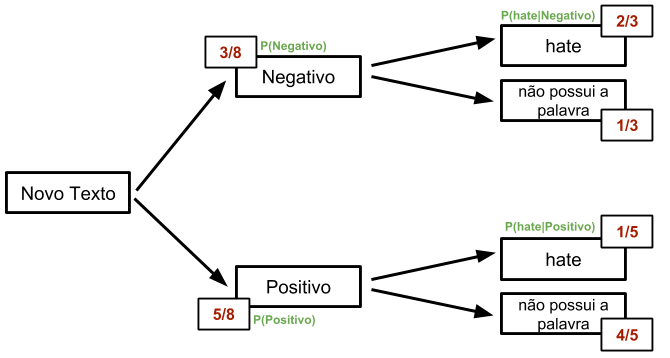

In [13]:
Image(filename='../images/04_image1.png', width=800) 

Para aplicar o Teorema de Bayes devemos, inicialmente, calcular as probabilidades de cada classe. No conjunto de textos que foi observado, temos: $P(Negativo) = 3/8$ e $P(Positivo) = 5/8$ Ou seja, dos 8 textos disponíveis na base, 3 foram classificados como negativos e 5 como positivos. Essa probabilidade, como dito anteriormente, é chamada de apriori. Vamos analisar a ocorrência da palavra `hate` para que possamos chegar na probabilidade aposteriori (inferida) desejada. 

Dos textos negativos, teremos alguns com a palavra `hate` e outros sem a palavra `hate`. O mesmo acontece para o caso dos textos positivos. Essas probabilidades são indicadas a seguir: 

* $P(hate|Negativo)$: qual a probabilidade do texto ter a palavra `hate`, dado que ele é negativo? Em outras palavras, queremos saber dentro dos textos negativos, qual a proporção de textos com a palavra `hate`? Analisando os textos, temos que é $2/3$. 

> I **hate** that music
>
> That band is not so good
>
> I **hate** that band

* $P(hate|Positivo)$: qual a probabilidade do texto ter a palavra `hate`, dado que ele é positivo? Em outras palavras, queremos saber dentro dos textos positivos, qual a proporção de textos com a palavra `hate`? Analisando os textos, temos que é $1/5$. 

> That band is amazing
>
> I like it
>
> I don't know if I **hate** that band
> 
> The sound is good
> 
> Great music

Apesar de calculadas, as  probabilidades de quando a palavra não aparece no texto não será utilizada no nosso cálculo do teorema. 

### Pronto! Já podemos aplicar o Teorema de Bayes ... 

... para calcular a probabilidade desejada: $P(Negativo|hate)$ (a probabilidade do texto ser negativo dado que apareceu a palavra `hate`).

$P(Negativo|hate) = \frac{P(Negativo) * P(hate|Negativo)}{P(Negativo)*P(hate|Negativo) + P(Positivo)*P(hate|Positivo)} = \frac{3/8*2/3}{3/8*2/3 + 5/8 * 1/5} = 2/3 = 66,7\%$

### Seguimos o mesmo raciocínio para `good`

Qual a probabilidade de um texto ser Negativo dado que apareceu a palavra `good`? 

O cenário da palavra `good` pode ser visto na imagem a seguir:

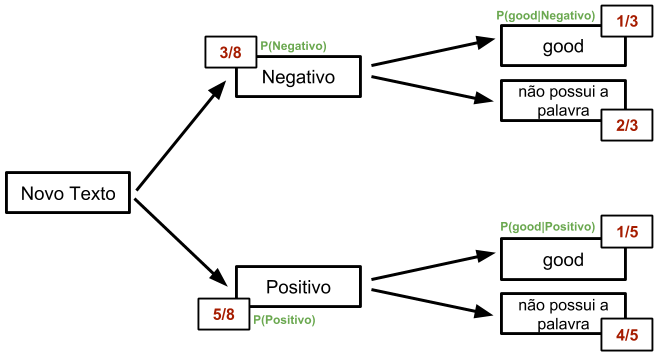

In [14]:
Image(filename='../images/04_image2.png', width=800) 

As probabilidades do texto ser Positivo ou Negativo continuam as mesmas.

Dos textos negativos, teremos alguns com a palavra `good` e outros sem a palavra `good`. O mesmo acontece para o caso dos textos positivos. Essas probabilidades são indicadas a seguir: 

* $P(good|Negativo)$: qual a probabilidade do texto ter a palavra `good`, dado que ele é negativo? Em outras palavras, queremos saber dentro dos textos negativos, qual a proporção de textos com a palavra `good`? Analisando os textos, temos que é $1/3$. 

> I hate that music
>
> That band is not so **good**
>
> I hate that band

* $P(good|Positivo)$: qual a probabilidade do texto ter a palavra `good`, dado que ele é positivo? Em outras palavras, queremos saber dentro dos textos positivos, qual a proporção de textos com a palavra `good`? Analisando os textos, temos que é $1/5$. 

> That band is amazing
>
> I like it
>
> I don't know if I hate that band
> 
> The sound is **good**
> 
> Great music

Apesar de calculadas, as  probabilidades de quando a palavra não aparece no texto não será utilizada no nosso cálculo do teorema. 

### Pronto! Já podemos aplicar o Teorema de Bayes ... 

... para calcular a probabilidade desejada: $P(Negativo|good)$ (a probabilidade do texto ser negativo dado que apareceu a palavra `good`).

$P(Negativo|good) = \frac{P(Negativo) * P(good|Negativo)}{P(Negativo)*P(good|Negativo) + P(Positivo)*P(good|Positivo)} = \frac{3/8*1/3}{3/8*1/3 + 5/8 * 1/5} = 1/2 = 50\%$

Com isso, temos as probabilidades: 

$P(Negativo|hate) = 0.66 = 66\%$

$P(Negativo|good = 0.5 = 50\%$

### Mas ainda não é o que queremos ... 

... nossa pergunta no início foi: **Qual a probabilidade de um texto ser Negativo dado que ele possui as palavras `hate` e `good`?**

Para isso devemos calcular: $P(Negativo|hate,good)$.

No caso do `Naive Bayes` vamos supor que as palavras são independentes. Essa suposição faz desse algoritmo ser conhecido como `ingênuo` ou `Naive`. Isso nem sempre é verdade, uma palavra pode influenciar outra dentro de um texto. No entanto, para muitos casos, isso é aceitável. Aceitando essa suposição, podemos calcular a probabilidade desejada usando a multiplicação das probabilidades de cada palavra. 

Sendo assim, assumindo que os atributos são independentes, temos que:

$P(A|B,C) = P(A|B) * P(A|C)$. No nosso caso, temos:

$P(Negativo|hate, good) = P(Negativo|hate) * P(Negativo|good)$

Substituindo os valores:

$P(Negativo|hate, good) = P(Negativo|hate) * P(Negativo|good) = 0.66 * 0.5 = 0.33 = 33\%$

Sendo assim, temos 33% de chances de um texto que possua as palavras `good` e `hate` ser classificado como um texto positivo. O algoritmo Naive Bayes utiliza exatamente esse informação para fazer a inferência de qual classe uma instância pertence. 

### De forma geral, temos:

$P(C|P_1, P_2, ..., P_n) = P(C|P_1)*P(C|P_2)*...*P(C|P_n)$,

onde $P(C|P_i) = \frac{P(C)*P(P_i|C)}{P(C)*P(P_i|C) + P(C^c)*P(P_ i|C^c)}$

## Algoritmos `Naive Bayes`

O scikit-learn apresenta [um breve resumo sobre o Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html). A API permite a implementação de 3 tipos de NB, são eles: **Gaussian Naive Bayes (*GaussianNB*)**, **Multinomial Naive Bayes (*MultinomialNB*)** e **Bernoulli Naive Bayes (*BernoulliNB*)**. [Este link](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/) apresenta uma boa definição para cada um dos 3, segue a transcrição:

> **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.
> 
> **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
>
> **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

A depender do tipo de dados, devemos escolher o mais adequado para nosso problema.

### Classificando texto usando `Naive Bayes` no `scikit-learn`

Para usar o Naive Bayes na classificação de textos, precisamos mapear nosso problema para o formato desejado. Nesse caso, utilizamos o chamado `Bag of Words` que nada mais é do que uma matriz onde as linhas são os textos e as colunas as palavras que fazem parte daquele conjunto de textos. Na matriz armazenamos para cada linha, a frequência da palavra (coluna) no texto corrente. Vamos trabalhar com o conjunto de textos apresentados anteriormente.

In [34]:
# Conjunt de textos
texts = ['I hate that music', 'That band is not so good', 'I hate that band', 'That band is amazing', 'I like it', 
         'I dont know if I hate that band', 'The sound is good', 'Great music']

# Labels: (1) Positivo e (0) Negativo
labels = [0, 0, 0, 1, 1, 1, 1, 1]

Para construir o Bag of Words vamos utilizar a classe `CountVectorizer` do scikit-learn.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(texts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

O `count_vector` representa a matriz construída a partir dos textos passados. As linhas representam cada um dos textos e as colunas as palavras. Ou seja, cada texto é uma instância para nosso problema de classificação e cada palavra é um atributo que representa as características de cada instância.

O método a seguir imprime o nome de cada uma das colunas consideradas no nosso modelo.

In [26]:
count_vector.get_feature_names()

['amazing',
 'band',
 'dont',
 'good',
 'great',
 'hate',
 'if',
 'is',
 'it',
 'know',
 'like',
 'music',
 'not',
 'so',
 'sound',
 'that',
 'the']

A matriz pode ser visualizada a partir do código a seguir.

In [29]:
doc_array = count_vector.transform(texts).toarray()
doc_array

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

Visualizando melhor temos: 

> **0:** I hate that music
>
> **1:** That band is not so good
>
> **2:**  I hate that band
>
> **3:** That band is amazing
>
> **4:** I like it
>
> **5:** I don't know if I **hate** that band
>
> **6:** The sound is good
>
> **7:** Great music

In [30]:
frequency_matrix = pd.DataFrame(doc_array, columns=count_vector.get_feature_names())
frequency_matrix

,amazing,band,dont,good,great,hate,if,is,it,know,like,music,not,so,sound,that,the
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
7,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Vamos treinar o modelo

Só para demonstrar, vamos treinar o modelo construído e fazer a predição com um texto que tenha somente as palavras `hate` e `good`.

In [36]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(frequency_matrix, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
test_matrix = pd.DataFrame([[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 
                           columns=count_vector.get_feature_names())
test_matrix

,amazing,band,dont,good,great,hate,if,is,it,know,like,music,not,so,sound,that,the
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
naive_bayes.predict(test_matrix)

array([0])

O texto foi considerado como **Negativo**.